In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/appliance_energy.csv')
print(df.head())


   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [11]:
X = df.drop('Energy Consumption (kWh)', axis=1)  # Features (independent variables)
y = df['Energy Consumption (kWh)']  # Target variable (dependent variable)

In [12]:
xtrain ,xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
xtrain.head()
ytrain.head()

,Energy Consumption (kWh)
55,3.378030
88,3.756114
26,1.727990
42,2.140188
69,3.864685


In [14]:
model = LinearRegression()

model.fit(xtrain, ytrain)

LinearRegression()

In [15]:
print("slope: ",model.coef_)
print("intercept : ", model.intercept_)

slope:  [0.08996618]
intercept :  0.22196391661907633


In [17]:
y_pred=model.predict(xtest)
print(y_pred)

[1.6858187  3.18154068 2.96097494 2.76354868 2.0370856  2.36343345
 2.09711944 3.12445907 1.60849483 2.24537556 2.34866555 2.66462648
 3.0387357  3.27880886 1.78664542 1.85218469 2.95922164 1.70468695
 3.0692904  1.87828475]


In [18]:
mse=mean_squared_error(ytest,y_pred)
print(mse)

0.16342487842925055


In [19]:
r2 = r2_score(ytest, y_pred)
print(r2)

0.6119478445218713


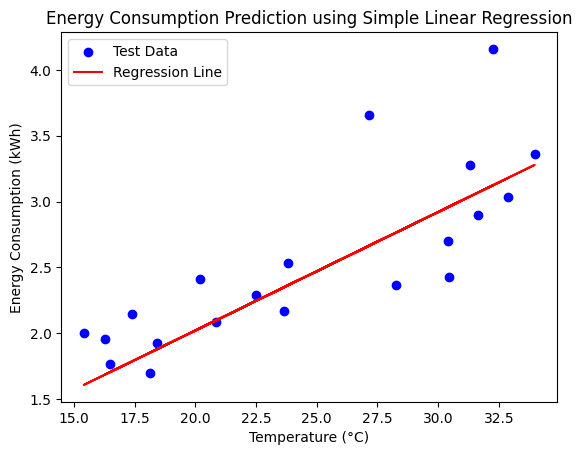

In [23]:
plt.scatter(xtest, ytest, color='blue', label='Test Data')  # Actual data
plt.plot(xtest, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [28]:
import joblib
joblib.dump(model,'application_energy_model.pkl')

['application_energy_model.pkl']

In [29]:
print("Make a prediction:")
try:
    # Input temperature for prediction
    input_temp = float(input("Enter a temperature value (°C): "))

    # Reshape the input for prediction if necessary (e.g., for sklearn models)
    input_array = np.array([[input_temp]])

    # Predict using the trained model
    predicted_consumption = model.predict(input_array)[0]

    # Display the prediction
    print(f"Predicted Energy Consumption at {input_temp}°C: {predicted_consumption:.2f} kWh")
except Exception as e:
    print("Error in prediction:", e)

Make a prediction:
Enter a temperature value (°C): 45
Predicted Energy Consumption at 45.0°C: 4.27 kWh


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
